# Exponential Moving Average Crossover Model

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta
from sharpe import gen_sharpe
from fin_table_obj import Table
from ema_cross_obj import ExpMovingAverageTable

Downloading Data:

In [2]:
# YYYY-MM-DD
start = "2014-04-25"

# for current day: str(date.today() - timedelta(1))
end = str(date.today() - timedelta(1))

# model trading days input for crossover visualization in days. standard 1Y is 252 days. Can use multiples of 252 to track years
model_days = 252 * 1

#multi_level_index = False | removes ticker noise in table
QQQ = (yf.download("QQQ", start, end, multi_level_index = False))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Complete Table Creation

In [3]:
QQQ_ema_table = ExpMovingAverageTable(QQQ, ma1 = 50, ma2 = 250)
QQQ_ema_table.gen_table()

,Day Count,Open,High,Low,Close,50-day EMA,250-day EMA,Return,Cumulative Return,EMA Model Return,Cumulative EMA Model Return,Signal,Entry
Date,,,,,,,,,,,,,
2015-04-23,251,100.288,101.464,100.269,101.010,98.468,91.595,NaN,NaN,0.377,0.378,1,1.0
2015-04-24,252,102.075,102.520,101.909,102.381,98.568,91.670,1.348,1.357,1.348,1.740,1,0.0
2015-04-27,253,102.761,102.955,101.899,102.122,98.717,91.756,-0.253,1.101,-0.254,1.482,1,0.0
2015-04-28,254,102.196,102.390,101.057,101.918,98.851,91.838,-0.200,0.899,-0.200,1.279,1,0.0
2015-04-29,255,101.353,101.946,100.723,101.279,98.971,91.919,-0.629,0.266,-0.629,0.644,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-21,2764,438.230,439.080,427.930,433.110,477.604,475.770,-2.506,328.779,-2.506,110.236,1,0.0
2025-04-22,2765,438.820,447.580,437.620,444.480,475.859,475.431,2.591,340.036,2.591,115.754,1,0.0
2025-04-23,2766,458.170,463.380,452.880,454.560,474.628,475.184,2.242,350.015,-2.242,110.971,-1,-2.0


# MA Cross-Over Grid Visualization

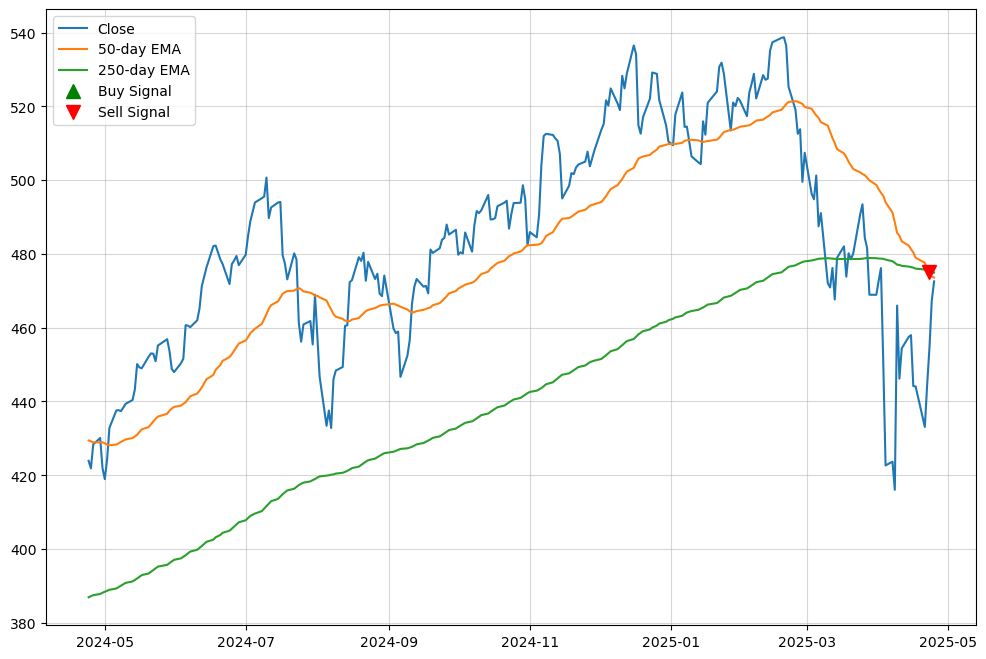

In [4]:
QQQ_ema_table.gen_ema_cross_visual(model_days)

# Buy/Hold to SMA Returns Comparison

QQQ Cumulative Buy/Hold Return: 367.84
QQQ Cumulative EMA Model Return: 102.93


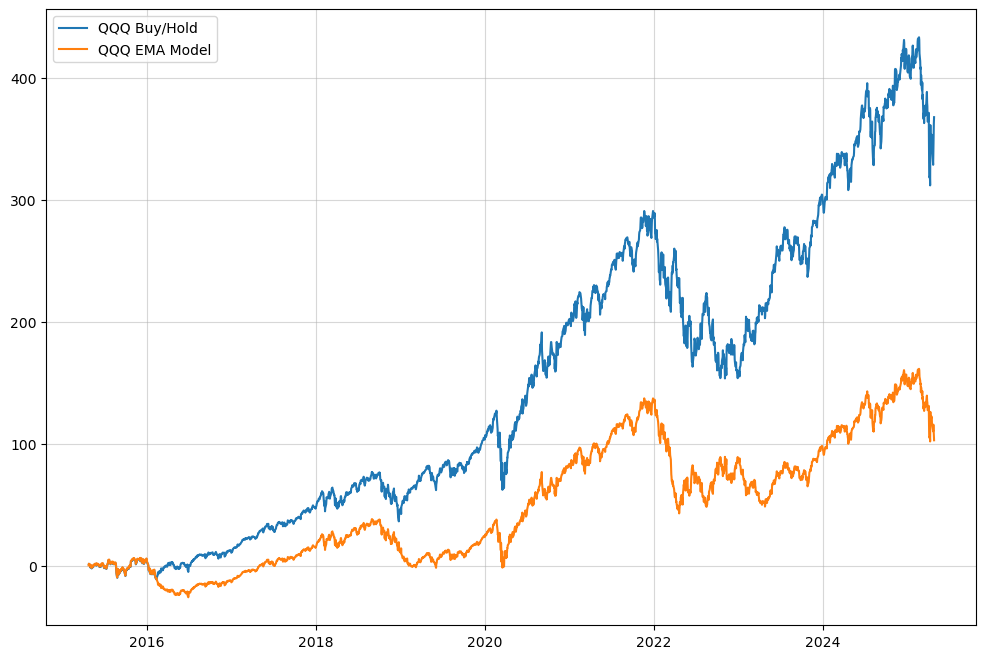

In [5]:
QQQ_ema_table.print_cumulative_return("QQQ")
QQQ_ema_table.gen_buyhold_comp("QQQ")

# Sharpe Ratio:

In [6]:
print('Buy/Hold Sharpe Ratio:', round(gen_sharpe(QQQ_ema_table.gen_table()['Return']), 2))
print('Model Sharpe Ratio:', round(gen_sharpe(QQQ_ema_table.gen_table()['EMA Model Return']), 2))

Buy/Hold Sharpe Ratio: 0.74
Model Sharpe Ratio: 0.36


# Volatility

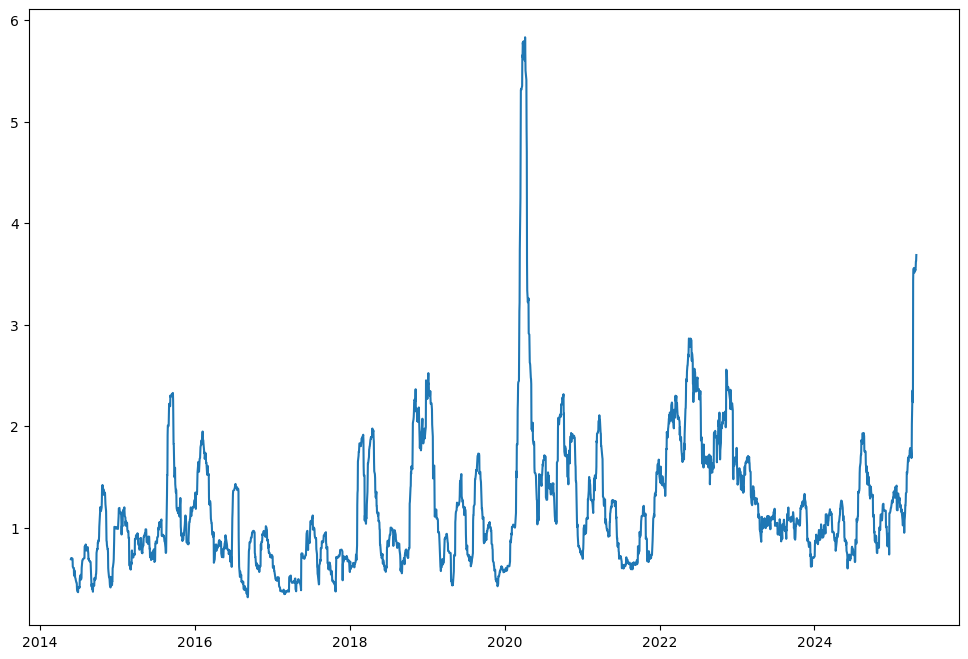

In [7]:
plt.plot(QQQ.Volatility);